# imports

In [1]:
import pandas as pd
from itertools import permutations

# preprocessing

In [2]:
raw_data = pd.read_excel('../65977-66006-proteinGroups-genes (1).xlsx')
df = pd.concat((raw_data.iloc[:,0:6] , raw_data.filter(regex='LFQ').filter(regex='\.')),axis=1)
df

,Protein IDs,Majority protein IDs,Protein names,Gene names,Fasta headers,Number of proteins,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,...,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,LFQ intensity 3.3_away from periphery,LFQ intensity 4.1_center,LFQ intensity 4.2_periphery,LFQ intensity 4.3_away from periphery,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery
0,Q91XV3,Q91XV3,Brain acid soluble protein 1,Basp1,>sp|Q91XV3|BASP1_MOUSE Brain acid soluble prot...,1,5838900000,1150200000,832110000,35222000,...,4266800000,2211200000,5177400000,904450000,1989700000,993560000,3203000000,246220000,1541200000,90141000
1,F6RT34;F6VME3,F6RT34;F6VME3,Myelin basic protein (Fragment),Mbp,>tr|F6RT34|F6RT34_MOUSE Myelin basic protein (...,2,1425700000,238810000,50979000,6226400,...,1097700000,356790000,105540000,57651000,726240000,73321000,22878000,257300000,23882000,12290000
2,P07724,P07724,Serum albumin,Alb,>sp|P07724|ALBU_MOUSE Serum albumin OS=Mus mus...,1,2049100000,636430000,212100000,230760000,...,243610000,524530000,252600000,42535000,4791900000,65318000,241620000,11427000000,323110000,37609000
3,P06837,P06837,Neuromodulin,Gap43,>sp|P06837|NEUM_MOUSE Neuromodulin OS=Mus musc...,1,1646000000,215720000,51905000,702840,...,173340000,269000000,177780000,48122000,436350000,13024000,96294000,71589000,54909000,3723800
4,P63260;G3UZ07;B1ATY1;G3UYG0;E9Q606;F8WGM8;F6WX...,P63260,"Actin, cytoplasmic 2",Actg1,">sp|P63260|ACTG_MOUSE Actin, cytoplasmic 2 OS=...",8,1522500000,876280000,196190000,191330000,...,770920000,754680000,570130000,171230000,1724100000,47085000,225420000,3302500000,222100000,91237000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Q9Z1R9,Q9Z1R9,MCG124046,Prss1,>tr|Q9Z1R9|Q9Z1R9_MOUSE MCG124046 OS=Mus muscu...,1,0,0,0,0,...,0,0,0,0,0,1297800000,1345300000,0,979630000,0
5068,Q9Z1W8,Q9Z1W8,Potassium-transporting ATPase alpha chain 2,Atp12a,>sp|Q9Z1W8|AT12A_MOUSE Potassium-transporting ...,1,13859000,5245600,0,1995100,...,0,5771500,9735100,0,13510000,0,4695300,2372200,0,0
5069,Q9Z2L6,Q9Z2L6,Multiple inositol polyphosphate phosphatase 1,Minpp1,>sp|Q9Z2L6|MINP1_MOUSE Multiple inositol polyp...,1,0,0,0,0,...,0,0,0,0,0,0,0,352400,0,0
5070,S4R2R5;S4R2Q9,S4R2R5,Ankyrin-2,Ank2,>tr|S4R2R5|S4R2R5_MOUSE Ankyrin-2 OS=Mus muscu...,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
for col in df.columns:
    print(col)

Protein IDs
Majority protein IDs
Protein names
Gene names
Fasta headers
Number of proteins
LFQ intensity 1.1_center
LFQ intensity 1.2_periphery
LFQ intensity 1.3_away from periphery
LFQ intensity 2.1_center
LFQ intensity 2.2_periphery
LFQ intensity 2.3_away from periphery
LFQ intensity 3.1_center
LFQ intensity 3.2_periphery
LFQ intensity 3.3_away from periphery
LFQ intensity 4.1_center
LFQ intensity 4.2_periphery
LFQ intensity 4.3_away from periphery
LFQ intensity 5.1_center
LFQ intensity 5.2_periphery
LFQ intensity 5.3_away from periphery


# Filtering all proteins with positive LFQ in at least three mice (in at least one position) 

In [4]:
filtered_df = pd.DataFrame()
rest_df = pd.DataFrame()
for protein in df.index:
    count = 0
    for mice in ['1\.', '2\.', '3\.','4\.', '5\.']:
        if df.filter(regex=mice).loc[protein].sum() > 0:
            count += 1
        if count == 3:
            filtered_df = filtered_df.append(df.iloc[protein, :])
            break
        if count < 3 and mice == '5\.':
            rest_df = rest_df.append(df.iloc[protein, :])
        

In [5]:
display(filtered_df.T)
display(rest_df.T)

,0,1,2,3,4,5,6,7,8,9,...,4912,4926,4932,4948,4968,4976,4987,5008,5055,5068
Fasta headers,>sp|Q91XV3|BASP1_MOUSE Brain acid soluble prot...,>tr|F6RT34|F6RT34_MOUSE Myelin basic protein (...,>sp|P07724|ALBU_MOUSE Serum albumin OS=Mus mus...,>sp|P06837|NEUM_MOUSE Neuromodulin OS=Mus musc...,">sp|P63260|ACTG_MOUSE Actin, cytoplasmic 2 OS=...",>sp|P20152|VIME_MOUSE Vimentin OS=Mus musculus...,>sp|P0DP28|CALM3_MOUSE Calmodulin-3 OS=Mus mus...,>sp|P20065|TYB4_MOUSE Thymosin beta-4 OS=Mus m...,>sp|P26350|PTMA_MOUSE Prothymosin alpha OS=Mus...,>sp|P83741|WNK1_MOUSE Serine/threonine-protein...,...,">sp|Q3UV17|K22O_MOUSE Keratin, type II cytoske...",>sp|Q61176|ARGI1_MOUSE Arginase-1 OS=Mus muscu...,>tr|Q8BKL1|Q8BKL1_MOUSE Protein SSXT OS=Mus mu...,>tr|Q80T06|Q80T06_MOUSE Elongation factor 1-de...,>sp|Q8BML2|OACYL_MOUSE O-acyltransferase like ...,>tr|Q8C5R8|Q8C5R8_MOUSE Phosphoribosyl pyropho...,>sp|Q8K0H5|TAF10_MOUSE Transcription initiatio...,>tr|Q9CPN9|Q9CPN9_MOUSE RIKEN cDNA 2210010C04 ...,>sp|Q9QZI8|SERC1_MOUSE Serine incorporator 1 O...,>sp|Q9Z1W8|AT12A_MOUSE Potassium-transporting ...
Gene names,Basp1,Mbp,Alb,Gap43,Actg1,Vim,Calm3;Calm2;Calm1,Tmsb4x,Ptma,Wnk1,...,Krt76,Arg1,Ss18,Eef1d,Oacyl,Prps1l1,Taf10,2210010C04Rik,Serinc1,Atp12a
LFQ intensity 1.1_center,5.8389e+09,1.4257e+09,2.0491e+09,1.646e+09,1.5225e+09,1.8502e+09,1.402e+09,7.4299e+08,6.9546e+08,6.7455e+08,...,1.1498e+09,1.6519e+06,0,0,1.6468e+07,2.3129e+06,0,2.9718e+06,875930,1.3859e+07
LFQ intensity 1.2_periphery,1.1502e+09,2.3881e+08,6.3643e+08,2.1572e+08,8.7628e+08,3.1934e+08,3.8342e+08,3.2445e+08,3.6415e+08,3.4662e+09,...,4.3138e+09,0,0,0,6.6278e+06,0,0,1.8129e+07,0,5.2456e+06
LFQ intensity 1.3_away from periphery,8.3211e+08,5.0979e+07,2.121e+08,5.1905e+07,1.9619e+08,9.2014e+06,5.144e+08,3.2135e+08,1.0419e+08,5.4922e+09,...,2.5015e+09,0,0,0,7.5252e+06,0,0,2.1336e+07,0,0
LFQ intensity 2.1_center,3.5222e+07,6.2264e+06,2.3076e+08,702840,1.9133e+08,3.6759e+08,4.9489e+07,5.5644e+07,5.2649e+08,0,...,9.0779e+09,0,0,0,0,0,0,1.0612e+07,0,1.9951e+06
LFQ intensity 2.2_periphery,8.6949e+08,1.1262e+09,1.2152e+10,5.9614e+08,3.0953e+09,6.4655e+08,1.3645e+09,2.6536e+08,1.7431e+08,2.1755e+07,...,1.4248e+08,1.3089e+06,254610,2.6046e+07,1.529e+07,3.0592e+06,570520,2.8012e+06,779740,2.7154e+06
LFQ intensity 2.3_away from periphery,4.2668e+09,1.0977e+09,2.4361e+08,1.7334e+08,7.7092e+08,2.6116e+07,1.1052e+09,5.7146e+08,1.4559e+08,5.0063e+09,...,8.3703e+09,0,0,0,2.2848e+07,0,0,0,0,0
LFQ intensity 3.1_center,2.2112e+09,3.5679e+08,5.2453e+08,2.69e+08,7.5468e+08,8.0703e+07,1.1522e+09,3.4855e+08,1.7242e+09,4.2218e+09,...,7.0981e+09,0,0,2.2356e+06,1.7255e+07,0,0,1.6624e+07,0,5.7715e+06
LFQ intensity 3.2_periphery,5.1774e+09,1.0554e+08,2.526e+08,1.7778e+08,5.7013e+08,2.8723e+07,1.9011e+09,3.8215e+08,1.4609e+09,5.4914e+09,...,6.9447e+09,0,0,0,1.602e+07,0,0,2.4734e+07,0,9.7351e+06


,176,352,385,486,596,636,710,715,716,768,...,5061,5062,5063,5064,5065,5066,5067,5069,5070,5071
Fasta headers,>sp|Q9EPE9|AT131_MOUSE Manganese-transporting ...,>sp|Q7M750|OPALI_MOUSE Opalin OS=Mus musculus ...,>tr|G3X8X7|G3X8X7_MOUSE Vacuolar protein sorti...,>sp|P43276|H15_MOUSE Histone H1.5 OS=Mus muscu...,>tr|G5E846|G5E846_MOUSE Peripherin OS=Mus musc...,>sp|P63089|PTN_MOUSE Pleiotrophin OS=Mus muscu...,>sp|P19973|LSP1_MOUSE Lymphocyte-specific prot...,>tr|S4R1M2|S4R1M2_MOUSE Scaffold attachment fa...,>sp|Q9Z0E6|GBP2_MOUSE Guanylate-binding protei...,>sp|Q9Z0L0|TPBG_MOUSE Trophoblast glycoprotein...,...,>sp|Q9WV27|AT1A4_MOUSE Sodium/potassium-transp...,>sp|Q9WV31|ARC_MOUSE Activity-regulated cytosk...,>sp|Q9WV92|E41L3_MOUSE Band 4.1-like protein 3...,>sp|Q9WVK0|ATRAP_MOUSE Type-1 angiotensin II r...,">sp|Q9Z0S1|BPNT1_MOUSE 3(2),5-bisphosphate nuc...",>sp|Q9Z1K6|ARI2_MOUSE E3 ubiquitin-protein lig...,>tr|Q9Z1R9|Q9Z1R9_MOUSE MCG124046 OS=Mus muscu...,>sp|Q9Z2L6|MINP1_MOUSE Multiple inositol polyp...,>tr|S4R2R5|S4R2R5_MOUSE Ankyrin-2 OS=Mus muscu...,>tr|S4R2T7|S4R2T7_MOUSE Ankyrin-2 (Fragment) O...
Gene names,Atp13a1,Opalin,Vps16,Hist1h1b,Prph,Ptn,Lsp1,Safb,Gbp2,Tpbg,...,Atp1a4,Arc,Epb41l3,Agtrap,Bpnt1,Arih2,Prss1,Minpp1,Ank2,Ank2
LFQ intensity 1.1_center,0,8.6746e+06,0,7.5176e+06,288410,5.9046e+06,1.7333e+06,4.3701e+06,195590,1.0442e+06,...,0,0,0,0,0,0,0,0,0,0
LFQ intensity 1.2_periphery,0,0,0,5.9326e+06,0,0,0,0,127980,785820,...,0,0,0,0,0,0,0,0,0,0
LFQ intensity 1.3_away from periphery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LFQ intensity 2.1_center,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LFQ intensity 2.2_periphery,0,0,0,0,0,3.4672e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LFQ intensity 2.3_away from periphery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LFQ intensity 3.1_center,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LFQ intensity 3.2_periphery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pattern Finding

# utils functions

In [6]:
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import os

def get_specific_area(mouse_df, area_number):
    area_df = mouse_df
    for col_name in area_df.columns:
        x = re.search(f'(1|2|3|4|5)(\.|C){area_number}', col_name)
        if x == None:
            area_df = area_df.drop(col_name, 1)
    return area_df

def plot_common_violinplot(df_method, genes_index, gene_names_list):
    df_center = get_specific_area(df_method, 1)
    df_periphery = get_specific_area(df_method, 2)
    df_away = get_specific_area(df_method, 3)
    count = 0
    total = df_center.shape[0]
    for i, row in enumerate(genes_index,0):
        center = np.array(df_center.loc[row,:])
        periphery = np.array(df_periphery.loc[row,:])
        away = np.array(df_away.loc[row,:])
        labels = np.array(5*["Center"]+5*['Periphery']+5*['Away'])
        count=count+1
        concatinate_areas = np.concatenate((center,periphery,away),0)
        concatinate_areas = np.array([concatinate_areas, labels]).T
        violinplot_df = pd.DataFrame(concatinate_areas,columns = ['LFQ intensity','Label'])
#         violinplot_df.to_excel(str(gene_names_list[i]) + '.xlsx') 
        sns.set_palette("pastel")
        plt.figure(figsize=(10,10))
        sns.stripplot(x=np.array(violinplot_df.iloc[:,1]).astype('str'), 
                     y=np.array(violinplot_df.iloc[:,0]).astype('float'),size=20)
        plt.title(gene_names_list[i])
        axes = plt.gca()
        axes.set_ylabel('LFQ intensity')
        axes.set_ylim(2,max(axes.get_ylim()))
        my_path = os.path.abspath('a/') # Figures out the absolute path for you in case your working directory moves around.            
#         plt.savefig(os.path.join(my_path, gene_names_list[i] + '.png'))        
        plt.show()
    return count, total

def calc_fdrs(df, title, fdrs_to_check=[0.2, 0.15, 0.1, 0.05, 0.001]):
    fig, ax = plt.subplots(1,1)
    p_vals = df['p-val']
    
    #calculate observed and expected amounts of comperison.
    p_vals = p_vals.sort_values()
    observed = p_vals.rank(method='max')
    expected = p_vals * len(p_vals)
    fdrs = expected / observed
    #plot overabundance plot.
    ax.set_title(title)
    ax.set_xlabel('p values')
    ax.set_ylabel('amount of comparisons')
    ax.scatter(p_vals, observed, label='observed ranks', alpha = 0.3, facecolors='none', edgecolors = 'g')
    ax.scatter(p_vals, expected, label='expected ranks', alpha = 0.3, facecolors='none', edgecolors = 'b')
    ax.plot(p_vals, observed, label='observed ranks')
    ax.plot(p_vals, expected, label='expected ranks')
    
    # find the number of genes, k, at which we observe:
    label = ''
    for fdr in fdrs_to_check:
        comperisons_num = fdrs[fdrs <= fdr].count()
        label += f'\nfdr: {fdr}-genes number:{comperisons_num}'
        

    ax.text(0.4, 0.4, label)
#     display(fdrs)
    fdrs = fdrs.sort_index()
    return fdrs

# Finding positive pattern proteins

LFQ intensity 1.1_center                 0.689455
LFQ intensity 1.2_periphery              0.316354
LFQ intensity 1.3_away from periphery    0.134495
LFQ intensity 2.1_center                 0.218499
LFQ intensity 2.2_periphery              0.977212
LFQ intensity 2.3_away from periphery    0.252011
LFQ intensity 3.1_center                 0.303396
LFQ intensity 3.2_periphery              0.225201
LFQ intensity 3.3_away from periphery    0.149240
LFQ intensity 4.1_center                 0.872654
LFQ intensity 4.2_periphery              0.120197
LFQ intensity 4.3_away from periphery    0.170241
LFQ intensity 5.1_center                 0.974531
LFQ intensity 5.2_periphery              0.167113
LFQ intensity 5.3_away from periphery    0.135836
dtype: float64
{'1\\.': 0.18877677300972692, '2\\.': 0.15971027197028964, '3\\.': 0.05812821785654067, '4\\.': 0.08703344622963274, '5\\.': 0.14073544508800107}


/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

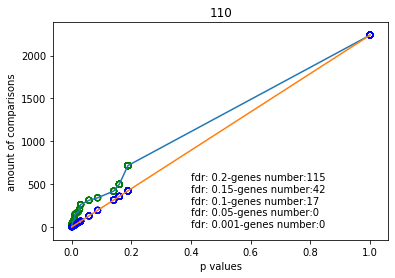

In [7]:
from itertools import combinations
positive_pattern_proteins_df = pd.DataFrame()
print((filtered_df.astype(bool).sum(axis=0) / filtered_df.shape[0]).iloc[2:17])
p_gene_is_absent = (filtered_df.astype(bool).sum(axis=0) / filtered_df.shape[0]).iloc[2:17]
# p 110

# calculate probability of 110 for each mouse.
probabilty_110_dict = dict()
for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
    p_c_present = filtered_df.filter(regex= mouse + '1').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    p_p_present = filtered_df.filter(regex= mouse + '2').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    p_a_present = filtered_df.filter(regex= mouse + '3').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    probabilty_110_dict[mouse] = p_c_present.iloc[0] * p_p_present.iloc[0] * (1-p_a_present.iloc[0])
    
print(probabilty_110_dict)

#iterates over the proteins.
for protein in filtered_df.index:
    
    count = 0
    p_110_mices_with_pattern = 1
    mices_without_pattern = []
    mices_with_pattern = []
    
    # count mice with 110 pattern and remember the mice without the pattern.
    for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
        mouse_df = filtered_df.filter(regex=mouse).loc[protein,:]
        if mouse_df.filter(regex= mouse + '1').iloc[0] > 0 and mouse_df.filter(regex= mouse + '2').iloc[0] > 0 and mouse_df.filter(regex= mouse + '3').iloc[0] == 0: 
            count += 1
            p_110_mices_with_pattern *= probabilty_110_dict[mouse]
            mices_with_pattern.append(mouse)
        else:
            mices_without_pattern.append(mouse) 
    
    # calaulate p-value of the current gene.
    pval = p_110_mices_with_pattern * np.prod([1 - probabilty_110_dict[m] for m in mices_without_pattern])
    # adding extremer results probabilities to p-val.
    for i in range(1, 5 - count + 1):
        for mices in combinations(mices_without_pattern, i):
            curr_p = p_110_mices_with_pattern
            for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
                if mouse not in mices_with_pattern:
                    if mouse in mices:
                    #print(probabilty_110_dict[mouse])
                        curr_p *= probabilty_110_dict[mouse]
                    else:
                        curr_p *= (1-probabilty_110_dict[mouse])

        
            pval += curr_p
            
    #adding information to the 110 pattern table.
    protein_data = filtered_df.loc[protein, :]
    protein_data['mice count'] = count
    protein_data['p-val'] = pval
    positive_pattern_proteins_df = positive_pattern_proteins_df.append(protein_data)
        
        
    
    
    
positive_pattern_proteins_df['FDR'] = calc_fdrs(positive_pattern_proteins_df,'110')  
positive_pattern_proteins_df.columns = [c for c in positive_pattern_proteins_df.columns if c !='FDR'] + ['FDR']


In [8]:
positive_pattern_proteins_df

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count,p-val,FDR
0,>sp|Q91XV3|BASP1_MOUSE Brain acid soluble prot...,Basp1,5.838900e+09,1.150200e+09,832110000.0,35222000.0,8.694900e+08,4.266800e+09,2.211200e+09,5.177400e+09,...,2.462200e+08,1.541200e+09,90141000.0,Q91XV3,1.0,Q91XV3,Brain acid soluble protein 1,0.0,1.000000,1.000000
1,>tr|F6RT34|F6RT34_MOUSE Myelin basic protein (...,Mbp,1.425700e+09,2.388100e+08,50979000.0,6226400.0,1.126200e+09,1.097700e+09,3.567900e+08,1.055400e+08,...,2.573000e+08,2.388200e+07,12290000.0,F6RT34;F6VME3,2.0,F6RT34;F6VME3,Myelin basic protein (Fragment),0.0,1.000000,1.000000
2,>sp|P07724|ALBU_MOUSE Serum albumin OS=Mus mus...,Alb,2.049100e+09,6.364300e+08,212100000.0,230760000.0,1.215200e+10,2.436100e+08,5.245300e+08,2.526000e+08,...,1.142700e+10,3.231100e+08,37609000.0,P07724,1.0,P07724,Serum albumin,0.0,1.000000,1.000000
3,>sp|P06837|NEUM_MOUSE Neuromodulin OS=Mus musc...,Gap43,1.646000e+09,2.157200e+08,51905000.0,702840.0,5.961400e+08,1.733400e+08,2.690000e+08,1.777800e+08,...,7.158900e+07,5.490900e+07,3723800.0,P06837,1.0,P06837,Neuromodulin,0.0,1.000000,1.000000
4,">sp|P63260|ACTG_MOUSE Actin, cytoplasmic 2 OS=...",Actg1,1.522500e+09,8.762800e+08,196190000.0,191330000.0,3.095300e+09,7.709200e+08,7.546800e+08,5.701300e+08,...,3.302500e+09,2.221000e+08,91237000.0,P63260,8.0,P63260;G3UZ07;B1ATY1;G3UYG0;E9Q606;F8WGM8;F6WX...,"Actin, cytoplasmic 2",0.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,>tr|Q8C5R8|Q8C5R8_MOUSE Phosphoribosyl pyropho...,Prps1l1,2.312900e+06,0.000000e+00,0.0,0.0,3.059200e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,2.755200e+06,0.000000e+00,0.0,Q8C5R8,1.0,Q8C5R8,Phosphoribosyl pyrophosphate synthetase 1-like 1,0.0,1.000000,1.000000
4987,>sp|Q8K0H5|TAF10_MOUSE Transcription initiatio...,Taf10,0.000000e+00,0.000000e+00,0.0,0.0,5.705200e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,1.115700e+06,0.000000e+00,0.0,Q8K0H5,1.0,Q8K0H5,Transcription initiation factor TFIID subunit 10,0.0,1.000000,1.000000
5008,>tr|Q9CPN9|Q9CPN9_MOUSE RIKEN cDNA 2210010C04 ...,2210010C04Rik,2.971800e+06,1.812900e+07,21336000.0,10612000.0,2.801200e+06,0.000000e+00,1.662400e+07,2.473400e+07,...,3.548200e+06,0.000000e+00,17402000.0,Q9CPN9,1.0,Q9CPN9,RIKEN cDNA 2210010C04 gene,2.0,0.009284,0.218704
5055,>sp|Q9QZI8|SERC1_MOUSE Serine incorporator 1 O...,Serinc1,8.759300e+05,0.000000e+00,0.0,0.0,7.797400e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,1.579500e+06,0.000000e+00,0.0,Q9QZI8,1.0,Q9QZI8,Serine incorporator 1,0.0,1.000000,1.000000


In [9]:
positive_pattern_proteins_df[positive_pattern_proteins_df['mice count'] ==4]#.iloc[:,:-5]

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count,p-val,FDR
77,>sp|P27546|MAP4_MOUSE Microtubule-associated p...,Map4,73238000.0,4316600.0,0.0,2301600.0,49544000.0,0.0,5454800.0,6687600.0,...,49029000.0,1663100.0,0.0,P27546;A0A140T8T5,8.0,P27546;A0A140T8T5;A0A0G2JFH2;A0A0G2JFT4;A0A0G2...,Microtubule-associated protein 4; Microtubule...,4.0,0.000369,0.165296
158,>sp|Q62167|DDX3X_MOUSE ATP-dependent RNA helic...,Ddx3x;D1Pas1,4143100.0,4102300.0,0.0,1294600.0,37015000.0,0.0,3952100.0,0.0,...,46636000.0,677840.0,0.0,Q62167;P16381,2.0,Q62167;P16381,ATP-dependent RNA helicase DDX3X; Putative AT...,4.0,0.000369,0.165296
203,>tr|A0A3B2WCD8|A0A3B2WCD8_MOUSE Far upstream e...,Khsrp,41535000.0,7300200.0,0.0,2795600.0,104240000.0,0.0,6996200.0,3311300.0,...,300010000.0,1677400.0,0.0,A0A3B2WCD8;Q3U0V1,3.0,A0A3B2WCD8;Q3U0V1;A0A3B2W465,Far upstream element-binding protein 2,4.0,0.000247,0.183997
284,>sp|Q60829|PPR1B_MOUSE Protein phosphatase 1 r...,Ppp1r1b,12622000.0,25374000.0,0.0,919440.0,250400000.0,4662100.0,19419000.0,2182400.0,...,13538000.0,3028300.0,0.0,Q60829,1.0,Q60829,Protein phosphatase 1 regulatory subunit 1B,4.0,0.000134,0.300805
696,>sp|Q6ZWN5|RS9_MOUSE 40S ribosomal protein S9 ...,Rps9,4886900.0,5630500.0,0.0,972850.0,6196800.0,0.0,6562300.0,1247100.0,...,8216900.0,1212500.0,0.0,Q6ZWN5;F7CJS8;D3YWH9;Q9CXW7,6.0,Q6ZWN5;F7CJS8;D3YWH9;Q9CXW7;D3Z673;D3YUV6,40S ribosomal protein S9; 40S ribosomal prote...,4.0,0.000247,0.183997


In [10]:
positive_pattern_proteins_df[positive_pattern_proteins_df['p-val']<0.05]#.iloc[:,:-5]

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count,p-val,FDR
10,>sp|Q6P5F7|TTYH3_MOUSE Protein tweety homolog ...,Ttyh3,1.187100e+09,3.489600e+09,6.111700e+09,2.499800e+09,243520000.0,2.823900e+09,4.293700e+09,17561000.0,...,23477000.0,0.0,0.0,Q6P5F7,1.0,Q6P5F7,Protein tweety homolog 3,2.0,0.005059,0.171549
16,">sp|P16330|CN37_MOUSE 2,3-cyclic-nucleotide 3-...",Cnp,6.815400e+08,1.926600e+07,1.449500e+06,1.444300e+05,290490000.0,6.794200e+06,1.173100e+07,2536900.0,...,75250000.0,744650.0,0.0,P16330,9.0,P16330;A0A0J9YVF4;A0A0J9YTQ2;A0A0J9YV14;F6WBP1...,"2,3-cyclic-nucleotide 3-phosphodiesterase",2.0,0.008181,0.215393
32,">tr|A3KGU7|A3KGU7_MOUSE Spectrin alpha chain, ...",Sptan1,1.221500e+08,2.397400e+07,8.063300e+05,6.888800e+05,19708000.0,1.389600e+06,1.722900e+07,1708900.0,...,32561000.0,1700600.0,0.0,A3KGU7;A3KGU9,2.0,A3KGU7;A3KGU9,"Spectrin alpha chain, non-erythrocytic 1",2.0,0.008181,0.215393
39,>sp|P08551|NFL_MOUSE Neurofilament light polyp...,Nefl,2.727500e+08,2.144000e+07,1.226000e+07,0.000000e+00,53903000.0,3.626700e+07,1.168200e+07,36263000.0,...,7709700.0,1384100.0,0.0,P08551,1.0,P08551,Neurofilament light polypeptide,2.0,0.012249,0.181540
42,>tr|A3KGL9|A3KGL9_MOUSE Non-histone chromosoma...,Hmgn2,1.645300e+08,2.617200e+07,0.000000e+00,5.243900e+07,5108100.0,1.028800e+07,7.012300e+06,15398000.0,...,2072500.0,0.0,0.0,A3KGL9;F6W687;P09602;Q5XK38;J3QM43;B7ZCQ3,6.0,A3KGL9;F6W687;P09602;Q5XK38;J3QM43;B7ZCQ3,Non-histone chromosomal protein HMG-17; Non-h...,2.0,0.010973,0.170543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,>P02668 SWISS-PROT:P02668 Kappa-casein [Contai...,NaN,3.103900e+06,0.000000e+00,1.463000e+07,7.059300e+06,114030000.0,8.071600e+07,9.042900e+06,11864000.0,...,3314500.0,3374300.0,0.0,CON__P02668,1.0,CON__P02668,NaN,2.0,0.008181,0.215393
4733,>Q61782 TREMBL:Q61782 Tax_Id=10090 Gene_Symbol...,NaN,6.542900e+06,1.338700e+08,0.000000e+00,2.907900e+07,10778000.0,0.000000e+00,0.000000e+00,0.0,...,5604800.0,0.0,0.0,CON__Q61782,1.0,CON__Q61782,NaN,2.0,0.030150,0.258524
4799,>tr|F2Z471|F2Z471_MOUSE Voltage-dependent anio...,Vdac1,4.150100e+05,1.443900e+06,0.000000e+00,0.000000e+00,12275000.0,6.109500e+06,1.314800e+06,1778700.0,...,7076900.0,2306500.0,0.0,F2Z471,1.0,F2Z471,Voltage-dependent anion-selective channel pro...,3.0,0.001544,0.111490
5008,>tr|Q9CPN9|Q9CPN9_MOUSE RIKEN cDNA 2210010C04 ...,2210010C04Rik,2.971800e+06,1.812900e+07,2.133600e+07,1.061200e+07,2801200.0,0.000000e+00,1.662400e+07,24734000.0,...,3548200.0,0.0,17402000.0,Q9CPN9,1.0,Q9CPN9,RIKEN cDNA 2210010C04 gene,2.0,0.009284,0.218704


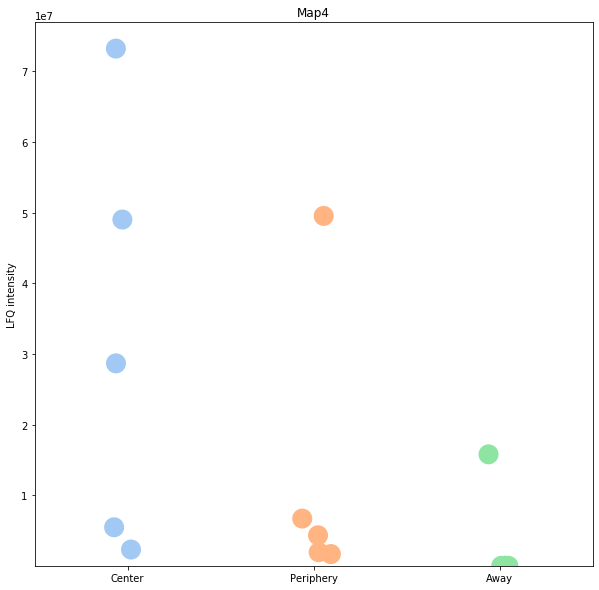

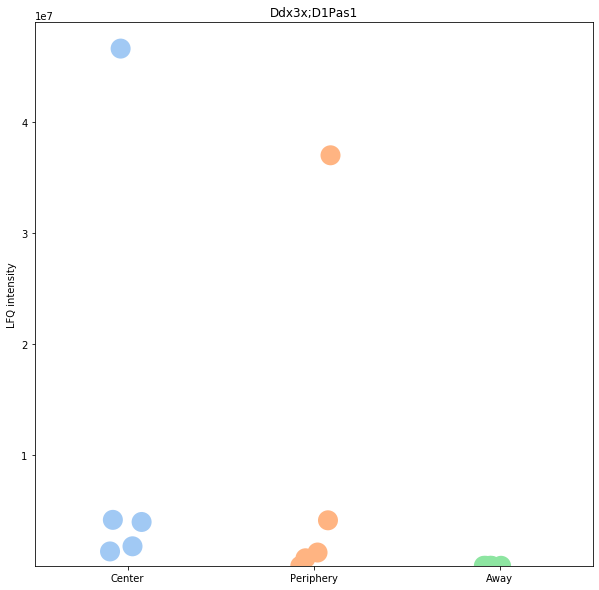

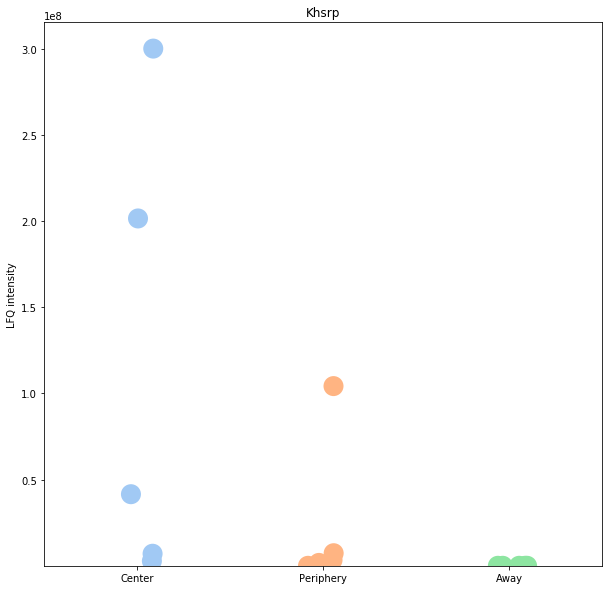

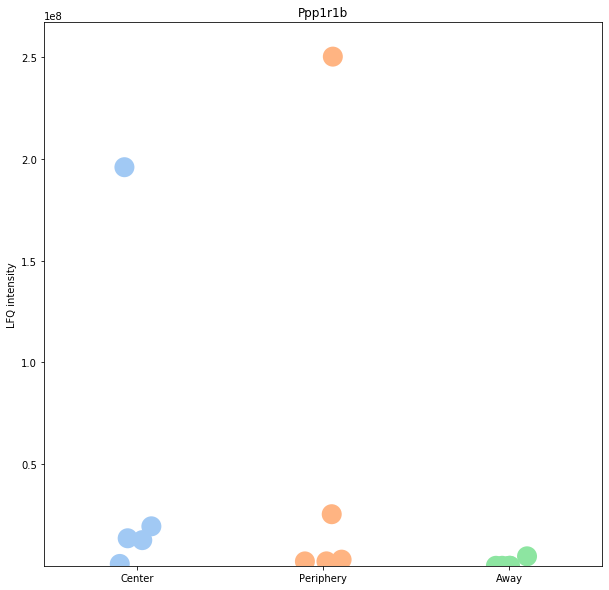

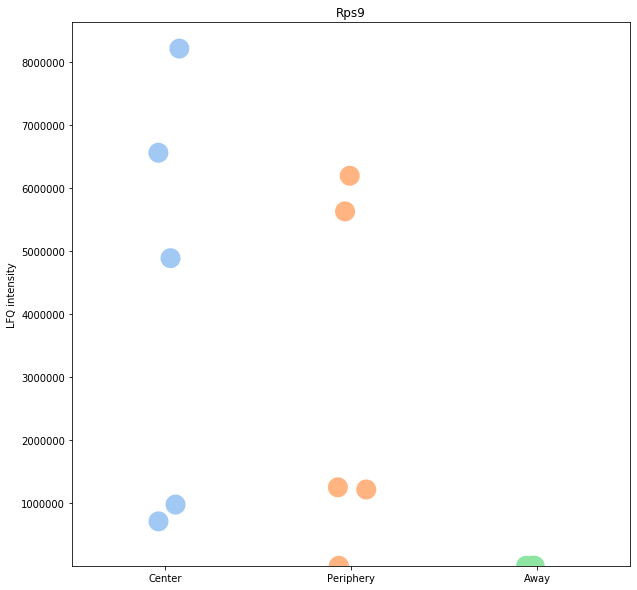

(5, 5)

In [11]:
plot_common_violinplot(positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>3],
                       positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>3].index,
                       np.array(positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>3].loc[:,'Gene names']))

In [12]:
np.array(positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>2].loc[:,'Gene names'])


array(['Nefm', 'Hnrnpa2b1', 'Map1b', 'Map4', 'Dnm1', 'Npm1', 'Nefh',
       'Palm', 'Pdia3', 'Hmgn1', 'Bcas1', 'Atp5f1d', 'Rpl19', 'Rpl6',
       'Cdv3', 'Hspa9', 'Ddx3x;D1Pas1', 'Rbmxl1;Gm7324', 'Ywhah', 'Amph',
       'Hsp90b1', 'Rpl13', 'Got2', 'Rps19', 'Rbm3', 'Khsrp', 'Hnrnpa1',
       'Cnbp', 'Hspa12a', 'Dbn1', 'Rps6', 'Ppp1r1b', 'Ly6h', 'Chgb',
       'Oxct1', 'Pcnp', 'Mif', 'Rps8', 'Caprin1', 'Rpl18', 'Eif5a',
       'Rab10', 'Acly', 'Dctn1', 'Kng1', 'Actn4', 'Atox1', 'Cox17',
       'Tomm70', 'Abhd14b', 'Rps9', 'Khdrbs1', 'Rps25', 'Icam5', 'Stx12',
       'Pfkl', 'Lmnb2', 'S100a11', 'Psmb10', 'Vapa', 'Vdac1', 'Atp12a'],
      dtype=object)

# ORDER (BY ORIGINAL DATA ORDER) AND SAVE POSITIVE PATTERN TABLE

In [13]:
a = pd.concat([positive_pattern_proteins_df, rest_df])
a = a.set_index('Protein IDs')
a = a.reindex(index=raw_data['Protein IDs'])
a = a.reset_index()
a

# for i, j in zip(a.index, raw_data.index):
#     print(i,j)
#     if a.loc[i,'Gene names'] != raw_data.loc[j,'Gene names']:
#         print(a.loc[i,'Protein IDs'], raw_data.loc[j,'Protein IDs'])

# a.to_excel('epulse-110-pattern.xlsx') #save possitive pattern table.

/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Finding negative pattern proteins

LFQ intensity 1.1_center                 0.689455
LFQ intensity 1.2_periphery              0.316354
LFQ intensity 1.3_away from periphery    0.134495
LFQ intensity 2.1_center                 0.218499
LFQ intensity 2.2_periphery              0.977212
LFQ intensity 2.3_away from periphery    0.252011
LFQ intensity 3.1_center                 0.303396
LFQ intensity 3.2_periphery              0.225201
LFQ intensity 3.3_away from periphery    0.149240
LFQ intensity 4.1_center                 0.872654
LFQ intensity 4.2_periphery              0.120197
LFQ intensity 4.3_away from periphery    0.170241
LFQ intensity 5.1_center                 0.974531
LFQ intensity 5.2_periphery              0.167113
LFQ intensity 5.3_away from periphery    0.135836
dtype: float64
{'1\\.': 0.02855370605806066, '2\\.': 0.004488061950028943, '3\\.': 0.08054923656026358, '4\\.': 0.019073715708808076, '5\\.': 0.002881469989213481}


/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


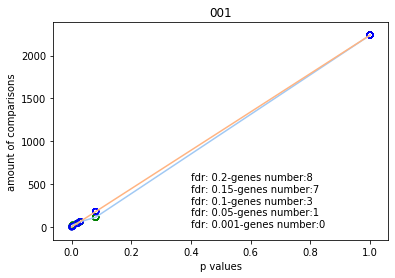

In [14]:
negative_pattern_proteins_df = pd.DataFrame()
print((filtered_df.astype(bool).sum(axis=0) / filtered_df.shape[0]).iloc[2:17])
p_gene_is_absent = (filtered_df.astype(bool).sum(axis=0) / filtered_df.shape[0]).iloc[2:17]
# p 110

# calculate probability of 001 for each mouse.
probabilty_001_dict = dict()
for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
    p_c_present = filtered_df.filter(regex= mouse + '1').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    p_p_present = filtered_df.filter(regex= mouse + '2').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    p_a_present = filtered_df.filter(regex= mouse + '3').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    probabilty_001_dict[mouse] = (1 - p_c_present.iloc[0]) * (1 - p_p_present.iloc[0]) * p_a_present.iloc[0]
    
print(probabilty_001_dict)

#iterates over the proteins.
for protein in filtered_df.index:
    
    count = 0
    p_001_mices_with_pattern = 1
    mices_without_pattern = []
    mices_with_pattern = []
    
    # count mice with 001 pattern and remember the mice without the pattern.
    for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
        mouse_df = filtered_df.filter(regex=mouse).loc[protein,:]
        if mouse_df.filter(regex= mouse + '1').iloc[0] == 0 and mouse_df.filter(regex= mouse + '2').iloc[0] == 0 and mouse_df.filter(regex= mouse + '3').iloc[0] > 0: 
            count += 1
            p_001_mices_with_pattern *= probabilty_001_dict[mouse]
            mices_with_pattern.append(mouse)
        else:
            mices_without_pattern.append(mouse) 
    
    # calaulate p-value of the current gene.
    pval = p_001_mices_with_pattern * np.prod([1 - probabilty_001_dict[m] for m in mices_without_pattern])
    # adding extremer results probabilities to p-val.
    for i in range(1, 5 - count + 1):
        for mices in combinations(mices_without_pattern, i):
            curr_p = p_001_mices_with_pattern
            for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
                if mouse not in mices_with_pattern:
                    if mouse in mices:
                    #print(probabilty_001_dict[mouse])
                        curr_p *= probabilty_001_dict[mouse]
                    else:
                        curr_p *= (1-probabilty_001_dict[mouse])

        
            pval += curr_p
            
    #adding information to the 001 pattern table.
    protein_data = filtered_df.loc[protein, :]
    protein_data['mice count'] = count
    protein_data['p-val'] = pval
    negative_pattern_proteins_df = negative_pattern_proteins_df.append(protein_data)
        
        
    
    
negative_pattern_proteins_df['FDR'] = calc_fdrs(negative_pattern_proteins_df,'001')  
negative_pattern_proteins_df.columns = [c for c in negative_pattern_proteins_df.columns if c !='FDR'] + ['FDR']


In [15]:
negative_pattern_proteins_df

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count,p-val,FDR
0,>sp|Q91XV3|BASP1_MOUSE Brain acid soluble prot...,Basp1,5.838900e+09,1.150200e+09,832110000.0,35222000.0,8.694900e+08,4.266800e+09,2.211200e+09,5.177400e+09,...,2.462200e+08,1.541200e+09,90141000.0,Q91XV3,1.0,Q91XV3,Brain acid soluble protein 1,0.0,1.0,1.0
1,>tr|F6RT34|F6RT34_MOUSE Myelin basic protein (...,Mbp,1.425700e+09,2.388100e+08,50979000.0,6226400.0,1.126200e+09,1.097700e+09,3.567900e+08,1.055400e+08,...,2.573000e+08,2.388200e+07,12290000.0,F6RT34;F6VME3,2.0,F6RT34;F6VME3,Myelin basic protein (Fragment),0.0,1.0,1.0
2,>sp|P07724|ALBU_MOUSE Serum albumin OS=Mus mus...,Alb,2.049100e+09,6.364300e+08,212100000.0,230760000.0,1.215200e+10,2.436100e+08,5.245300e+08,2.526000e+08,...,1.142700e+10,3.231100e+08,37609000.0,P07724,1.0,P07724,Serum albumin,0.0,1.0,1.0
3,>sp|P06837|NEUM_MOUSE Neuromodulin OS=Mus musc...,Gap43,1.646000e+09,2.157200e+08,51905000.0,702840.0,5.961400e+08,1.733400e+08,2.690000e+08,1.777800e+08,...,7.158900e+07,5.490900e+07,3723800.0,P06837,1.0,P06837,Neuromodulin,0.0,1.0,1.0
4,">sp|P63260|ACTG_MOUSE Actin, cytoplasmic 2 OS=...",Actg1,1.522500e+09,8.762800e+08,196190000.0,191330000.0,3.095300e+09,7.709200e+08,7.546800e+08,5.701300e+08,...,3.302500e+09,2.221000e+08,91237000.0,P63260,8.0,P63260;G3UZ07;B1ATY1;G3UYG0;E9Q606;F8WGM8;F6WX...,"Actin, cytoplasmic 2",0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,>tr|Q8C5R8|Q8C5R8_MOUSE Phosphoribosyl pyropho...,Prps1l1,2.312900e+06,0.000000e+00,0.0,0.0,3.059200e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,2.755200e+06,0.000000e+00,0.0,Q8C5R8,1.0,Q8C5R8,Phosphoribosyl pyrophosphate synthetase 1-like 1,0.0,1.0,1.0
4987,>sp|Q8K0H5|TAF10_MOUSE Transcription initiatio...,Taf10,0.000000e+00,0.000000e+00,0.0,0.0,5.705200e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,1.115700e+06,0.000000e+00,0.0,Q8K0H5,1.0,Q8K0H5,Transcription initiation factor TFIID subunit 10,0.0,1.0,1.0
5008,>tr|Q9CPN9|Q9CPN9_MOUSE RIKEN cDNA 2210010C04 ...,2210010C04Rik,2.971800e+06,1.812900e+07,21336000.0,10612000.0,2.801200e+06,0.000000e+00,1.662400e+07,2.473400e+07,...,3.548200e+06,0.000000e+00,17402000.0,Q9CPN9,1.0,Q9CPN9,RIKEN cDNA 2210010C04 gene,0.0,1.0,1.0
5055,>sp|Q9QZI8|SERC1_MOUSE Serine incorporator 1 O...,Serinc1,8.759300e+05,0.000000e+00,0.0,0.0,7.797400e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,1.579500e+06,0.000000e+00,0.0,Q9QZI8,1.0,Q9QZI8,Serine incorporator 1,0.0,1.0,1.0


In [16]:
negative_pattern_proteins_df[negative_pattern_proteins_df['mice count'] > 2].T#.iloc[:,:-5]

,4208
Fasta headers,">O43790 SWISS-PROT:O43790 Keratin, type II cut..."
Gene names,NaN
LFQ intensity 1.1_center,0
LFQ intensity 1.2_periphery,0
LFQ intensity 1.3_away from periphery,0
LFQ intensity 2.1_center,0
LFQ intensity 2.2_periphery,0
LFQ intensity 2.3_away from periphery,1.3118e+06
LFQ intensity 3.1_center,0
LFQ intensity 3.2_periphery,0


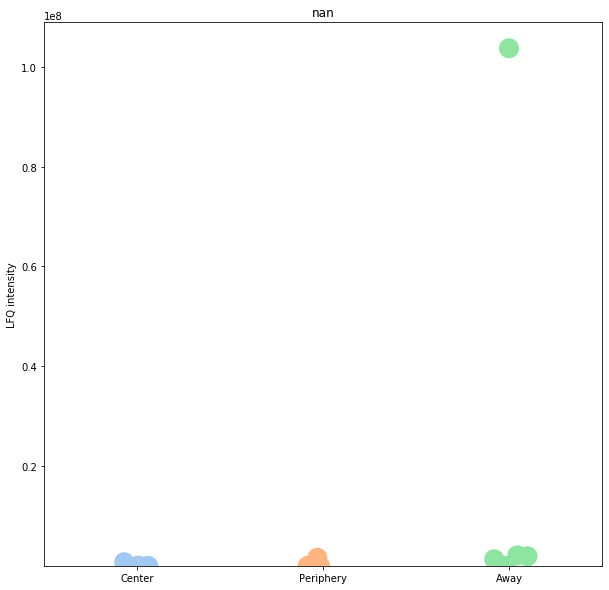

(1, 1)

In [17]:
plot_common_violinplot(negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>2],
                       negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>2].index,
                       np.array(negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>2].loc[:,'Gene names']))


In [18]:
np.array(negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>2].loc[:,'Gene names'])


array([nan], dtype=object)

# ORDER (BY ORIGINAL DATA ORDER) AND SAVE NEGATIVE PATTERN TABLE

In [19]:
a = pd.concat([negative_pattern_proteins_df, rest_df])
a = a.set_index('Protein IDs')
a = a.reindex(index=raw_data['Protein IDs'])
a = a.reset_index()

# for i, j in zip(a.index, raw_data.index):
#     print(i,j)
#     if a.loc[i,'Gene names'] != raw_data.loc[j,'Gene names']:
#         print(a.loc[i,'Protein IDs'], raw_data.loc[j,'Protein IDs'])

# a.to_excel('epulse-001-pattern.xlsx') #save negative pattern table.

/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [20]:
import sys
print(sys.version)


3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
